In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# importing the data
data = pd.read_csv('/content/drive/MyDrive/Datasets/bank.csv')
data.shape

(11162, 17)

In [6]:
# data sample
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# **Data Dictionary**


## 1. age (numeric).
## 2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","selfemployed","retired","technician","services").
## 3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed).
## 4. education (categorical: "unknown","secondary","primary","tertiary").
## 5. default: has credit in default? (binary: "yes","no").
## 6. balance: average yearly balance, in euros (numeric) .
## 7. housing: has housing loan? (binary: "yes","no").
## 8. loan: has personal loan? (binary: "yes","no")

## Related with the last contact of the current campaign:
## 9. contact: contact communication type (categorical: "unknown","telephone","cellular") .
## 10. day: last contact day of the month (numeric).
## 11. month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec").
## 12. duration: last contact duration, in seconds (numeric).
## 13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact).
## 14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted).
## 15. previous: number of contacts performed before this campaign and for this client (numeric).
## 16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success").
## Output variable (desired target):
## 17. deposit - has the client subscribed a term deposit? (binary: "yes","no").

In [7]:
# missing values- percentage of missing values
data.isnull().mean()*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64

In [8]:
# missing values- count of missing values

data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

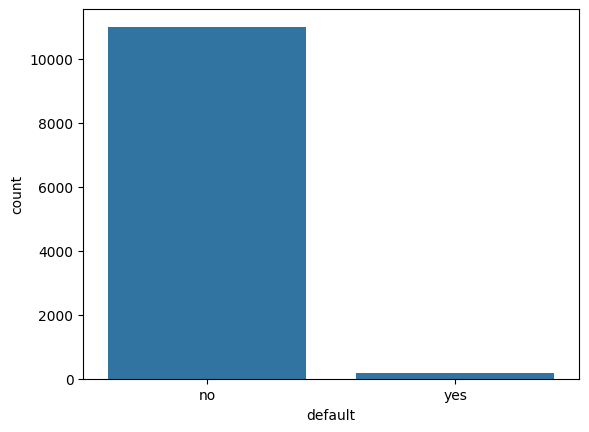

In [9]:
# analysing the target variable
sns.countplot(data, x='default')
plt.show()

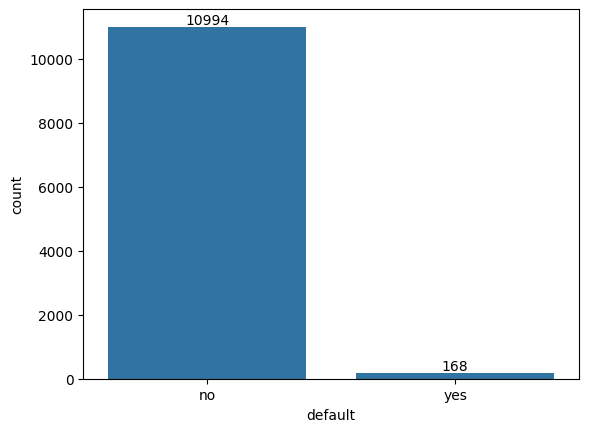

In [10]:
# analysing the target variable with count

ax = sns.countplot(data, x='default')
ax.bar_label(ax.containers[0])
plt.show()

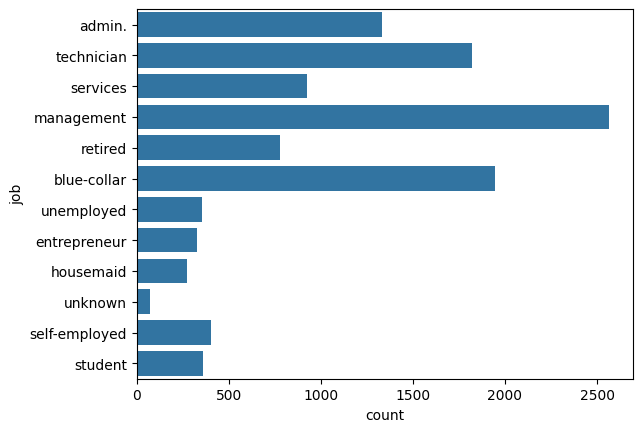

In [11]:
# eda on job

sns.countplot(data, y='job')
plt.show()

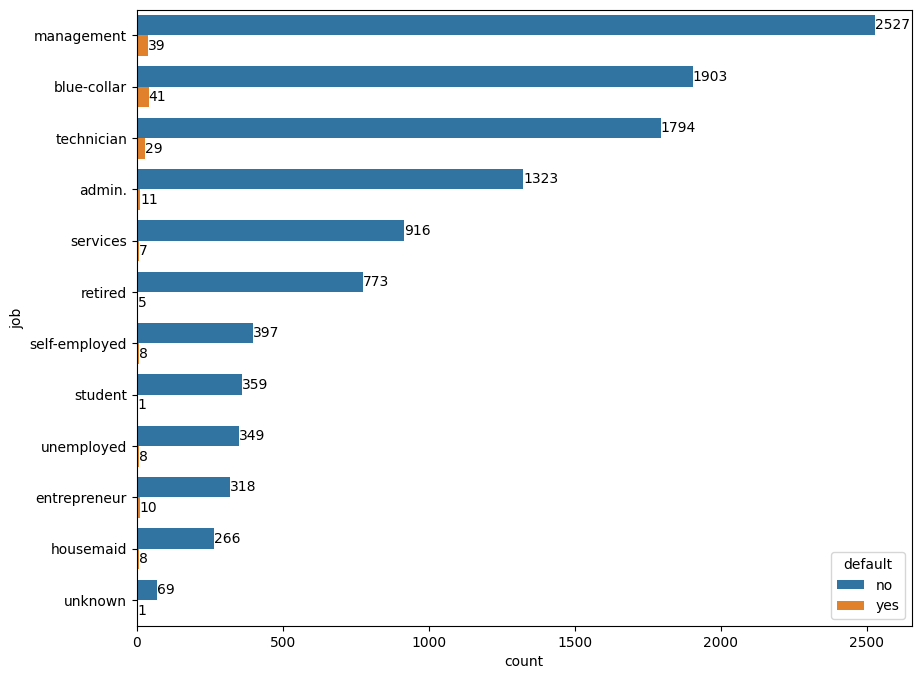

In [12]:
# eda on job with count
plt.figure(figsize=(10,8))
ax = sns.countplot(data, y='job', hue='default', order=data['job'].value_counts().index)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

In [13]:
# Preparing the data for ML Algorithm
# we need convert categorical data into numerical data
# we need to split the data into 2 halves

In [14]:
# Preparing the data for ML Algorithm

for cols in data:
  print(cols)

age
job
marital
education
default
balance
housing
loan
contact
day
month
duration
campaign
pdays
previous
poutcome
deposit


In [15]:


for cols in data:
  if data[cols].dtype == 'O':
    print(cols)

job
marital
education
default
housing
loan
contact
month
poutcome
deposit


In [16]:
# Preparing the data for ML Algorithm

# Label encoding the data

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for cols in data:
  if data[cols].dtype == 'O':
    data[cols] =  encoder.fit_transform(data[cols])

In [17]:
# data samle after encoding

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [18]:
# split the data into dependent and indepedent variable

x = data.drop('default', axis=1)
y =  data['default']

In [19]:
x

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,1,0,8,8,9,2,172,5,0,0


In [20]:
y

0        0
1        0
2        0
3        0
4        0
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: default, Length: 11162, dtype: int64

In [21]:
# split the data into training and testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [22]:
x_train.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2192,47,4,1,2,2351,0,0,0,2,6,163,2,84,1,2,1
6944,58,5,1,1,35,0,0,0,29,5,336,7,-1,0,3,0
8487,34,0,1,2,21,0,1,0,2,6,269,1,92,2,0,0
9782,52,0,1,1,-462,1,0,0,9,3,172,5,-1,0,3,0
109,41,1,1,0,1250,1,0,2,20,8,1392,2,-1,0,3,1


In [23]:
# decision tree algorithm

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42, max_depth=8, criterion='gini')
model.fit(x_train, y_train)
training_score = model.score(x_train, y_train)
testing_score = model.score(x_test, y_test)
print(training_score)
print(testing_score)

0.9895844999440027
0.9776085982982534


In [24]:
# predict the model

y_pred = model.predict(x_test)

In [25]:
# confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2183   14]
 [  36    0]]


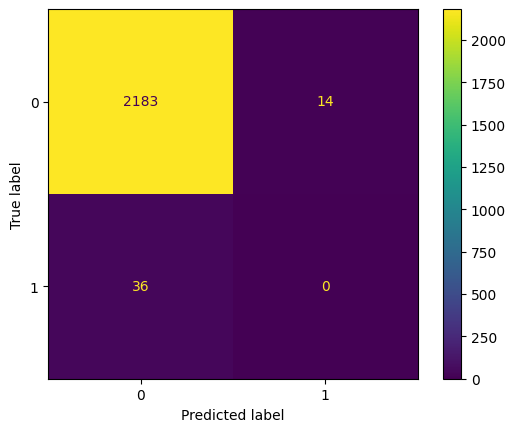

In [26]:
# confusion matrix display

from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(cm)

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy =  accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(accuracy)
print(precision)
print(recall)

0.9776085982982534
0.0
0.0


In [28]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2197
           1       0.00      0.00      0.00        36

    accuracy                           0.98      2233
   macro avg       0.49      0.50      0.49      2233
weighted avg       0.97      0.98      0.97      2233

